In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Two Templates

In [2]:
NDa, NMa, ma, sa = 1000000, 10000, 0.0, 1.0 
NDb, NMb, mb, sb =   10000, 10000, 2.0, 1.0 

amc = np.random.normal(ma,sa,NMa)
bmc = np.random.normal(mb,sb,NMb)

data = np.concatenate([
    np.random.normal(ma,sa,NDa),
    np.random.normal(mb,sb,NDb)
])

bins = np.linspace(-8,8,101)

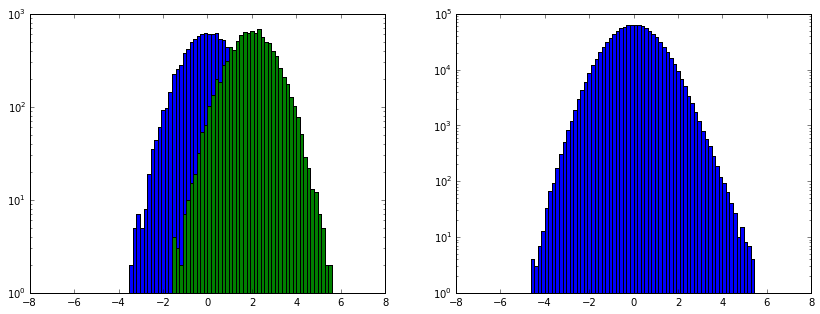

In [3]:
figsize(14,5)
subplot(1,2,1)
at,_,_ = hist(amc, bins);
bt,_,_ = hist(bmc, bins);
yscale('log')

subplot(1,2,2)
dh,_,_ = hist(data, bins);
yscale('log')

In [4]:
def get_exps(pa,pb):

    t = zeros_like(dh)
    # Newton method, btch
    for _ in range(10):
        f = dh/(1-t) - (pa*at/(1 + pa*t) + pb*bt/(1 + pb*t))
        fd = dh/(1-t)**2 + (pa**2)*at/(1 + pa*t)**2 + (pb**2)*bt/(1 + pb*t)**2
        t = t - f/fd
    t[np.isnan(t)] = 1
    exa, exb = at / (1 + pa * t), bt / (1 + pb * t)
    return exa, exb

In [5]:
pa, pb = 50, 1

In [11]:
for i in range(1001):
    if i % 100 == 0: print i, pa, pb
    exa, exb = get_exps(pa,pb)
    np.seterr(divide='ignore', invalid='ignore')
    pa += 0.001*nan_to_num((dh/(exa*pa + exb*pb) - 1)*exa).sum()
    pb += 0.001*nan_to_num((dh/(exa*pa + exb*pb) - 1)*exb).sum()
    np.seterr(divide='warn', invalid='warn')

0 99.4179669952 1.23510550359
100 99.4505234474 1.23496409892
200 99.4799718211 1.23483629279
300 99.5066119794 1.23472075528
400 99.5307142848 1.23461629054
500 99.5525226045 1.2345218226
600 99.5722569915 1.23443638269
700 99.5901160791 1.23435909813
800 99.6062792216 1.23428918239
900 99.6209084122 1.23422592625
1000 99.6341500004 1.23416868995


/afs/cern.ch/user/k/kostams/public/VirtualEnv/ipython/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


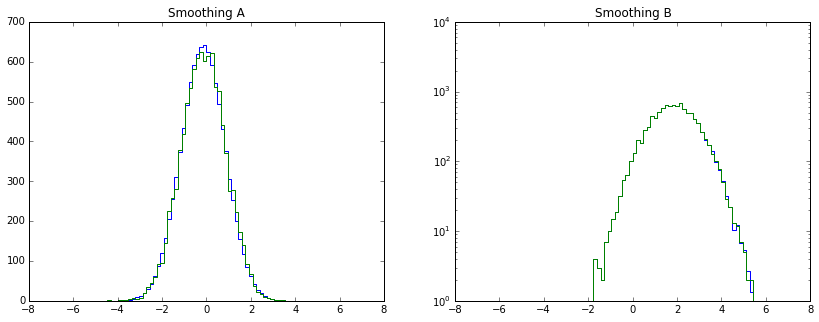

In [12]:
subplot(1,2,1)
plot(bins[:-1], exa, drawstyle='steps')
plot(bins[:-1], at, drawstyle='steps')
#yscale('log'); 
title("Smoothing A")
subplot(1,2,2)
plot(bins[:-1], exb, drawstyle='steps')
plot(bins[:-1], bt, drawstyle='steps')
yscale('log'); ylim(1,1e4); title("Smoothing B")

# 100 templates

In [13]:
ND = np.concatenate([1000*np.linspace(1,2,10), 10000*np.linspace(2,3,10)])
NM = np.concatenate([1000*np.ones(10), 1000*np.ones(10)])
m  = np.concatenate([np.linspace(0,1,10), np.linspace(2,3,10)])
s  = np.concatenate([0.1*np.ones(10), 0.1*np.ones(10)])

In [14]:
mcs = np.array([np.random.normal(ma,sa,int(NMA))
    for ma, sa, NMA in zip(m,s,NM)])
data = np.concatenate([np.random.normal(ma,sa,int(NDA))
    for ma, sa, NDA in zip(m,s,ND)])

bins = np.linspace(-1,4,101)

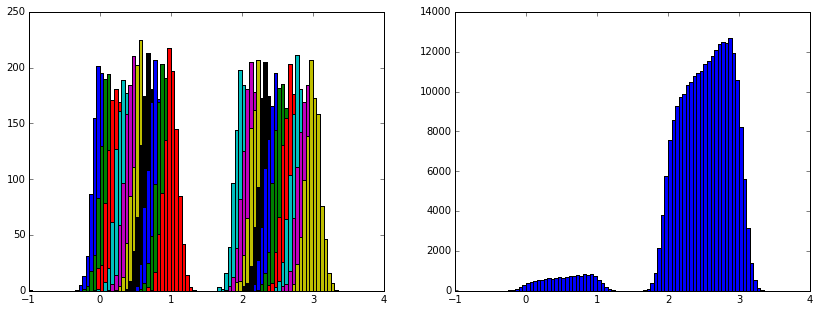

In [15]:
figsize(14,5)
ax = subplot(1,2,1)
mch = np.array([ ax.hist(amc, bins)[0] for amc in mcs ])
#yscale('log')

subplot(1,2,2)
dh,_,_ = hist(data, bins);
#yscale('log')

In [16]:
def get_exps(p):
    np.seterr(divide='ignore', invalid='ignore')
    t = zeros_like(dh)
    p = p[:,np.newaxis]
    for _ in range(10):
        f =  dh / (1 - t)    - ( p * mch  / (1 + t[np.newaxis,:] * p)    ).sum(axis=0)
        fd = dh / (1 - t)**2 + ((p**2)*mch/ (1 + t[np.newaxis,:] * p)**2 ).sum(axis=0)
        t = t - f/fd
        
    t[np.isnan(t)] = 1
    ex = mch / (1 + t[np.newaxis,:] * p)
    np.seterr(divide='warn', invalid='warn')
    return ex

In [36]:
p=np.ones(20)

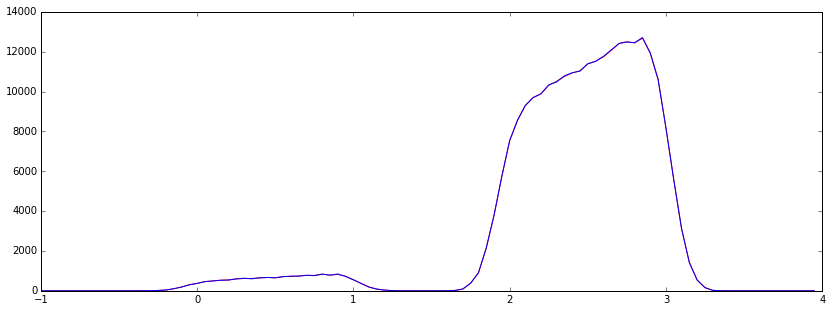

In [41]:
plot(bins[:-1],(get_exps(p)*p[:,np.newaxis]).sum(axis=0), 'r')
plot(bins[:-1],dh)

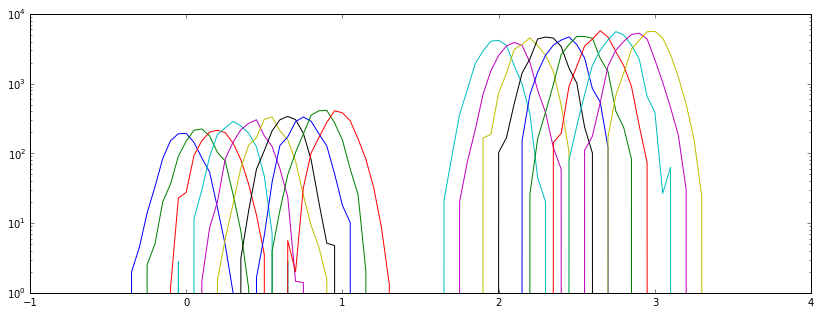

In [45]:
plot(np.array(20*[bins[:-1]]).T, (get_exps(p)*p[:,np.newaxis]).T);
yscale('log')

In [44]:
for i in range(1000):
    if i % 100 == 0: print p
    ex = get_exps(p)
    np.seterr(divide='ignore', invalid='ignore')
    p += 0.001 * (nan_to_num((dh/(ex*p[:,np.newaxis]).sum(axis=0) - 1))*ex).sum(axis=1)
    p[p<0] = 0

[  0.97910941   1.1317021    1.18567347   1.45667398   1.43864828
   1.51014372   1.64161492   1.65099422   2.04584663   1.95458295
  21.57243849  19.36015195  21.67241766  24.01126338  24.62887951
  25.85591648  26.47256025  27.04987299  27.85751679  28.86902532]
[  0.97901797   1.1320382    1.18511021   1.45722276   1.4383614
   1.51005909   1.64202369   1.6504647    2.04620539   1.95448781
  21.48699552  19.35374163  21.69867251  24.05482321  24.65582405
  25.89985988  26.53452814  27.10647746  27.90988194  28.95426314]
[  0.97893857   1.13233028   1.18461999   1.45770221   1.43810628
   1.50999675   1.64236219   1.65002271   2.04650534   1.95440817
  21.46825056  19.34969405  21.72280208  24.09357149  24.6771978
  25.93757639  26.58954169  27.15578025  27.95455563  29.03106545]
[  0.97886953   1.13258443   1.18419282   1.45812167   1.43787913
   1.50995248   1.64264184   1.64965431   2.04675581   1.95434158
  21.53931048  19.3374904   21.74153753  24.12761906  24.69378511
  25.9699

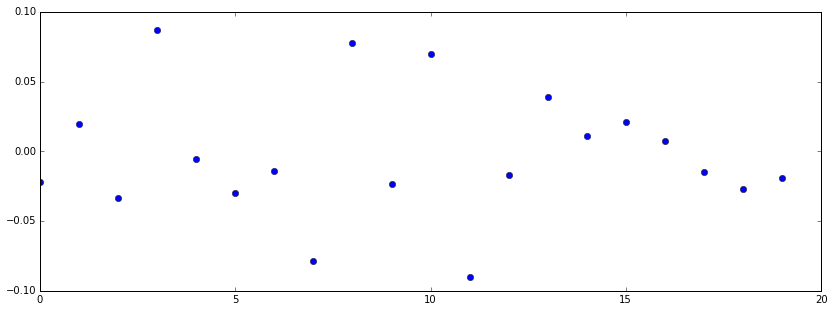

In [55]:
plot((p-ND/NM)/p,'o')

In [43]:
ND/NM

array([  1.        ,   1.11111111,   1.22222222,   1.33333333,
         1.44444444,   1.55555556,   1.66666667,   1.77777778,
         1.88888889,   2.        ,  20.        ,  21.11111111,
        22.22222222,  23.33333333,  24.44444444,  25.55555556,
        26.66666667,  27.77777778,  28.88888889,  30.        ])